In [2]:
from collections import defaultdict
import json
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

import ihop
from ihop.community2vec import GensimCommunity2Vec
import ihop.clustering as ic

In [3]:

DATA_ROOT = Path("../data")
C2V_ROOT = DATA_ROOT / "community2vec"

MONTHS = sorted(["2021-04", "2021-05", "2021-06", "2021-07", "2021-08", "2021-09", "2021-10", "2021-11", "2021-12", "2022-01", "2022-02", "2022-03"
])
VIZ_PATH = DATA_ROOT / "paper_visuals"

In [4]:
metrics_list = []
for m in MONTHS:
    metrics_path = C2V_ROOT / f"RC_{m}"/"best_model" / "metrics.json"
    with open(metrics_path) as f:
        month_metrics = json.load(f)
    params_path = C2V_ROOT / f"RC_{m}"/"best_model" / "parameters.json"
    with open(params_path) as f:
        params = json.load(f)
    month_metrics["month"]=m
    month_metrics["total_analogies_available"]=int(month_metrics["detailed_analogy_results"].split(":")[-1].split("/")[1])
    month_metrics["num_users"] = params["num_users"]

    comment_counts_df = pd.read_csv(C2V_ROOT / f"RC_{m}" / "subreddit_counts.csv", header=0)
    total_comments = comment_counts_df["count"].sum()
    month_metrics["total_comments"] = total_comments
    metrics_list.append(month_metrics)

metrics_df = pd.DataFrame.from_records(metrics_list)
metrics_df["total_comments_log"] =  np.log(metrics_df["total_comments"])
metrics_df["unique_users_log"] = np.log(metrics_df["num_users"])
display(metrics_df)
    


,model_id,contexts_path,analogy_accuracy,detailed_analogy_results,num_users,max_comments,epochs,vector_size,skip_gram,hierarchical_softmax,...,alpha,min_alpha,seed,batch_words,sample,month,total_analogies_available,total_comments,total_comments_log,unique_users_log
0,alpha0.05_negative10_sample0.001_vectorSize100,data/community2vec/RC_2021-04/user_contexts,0.619700,"major-league-baseball:285/406,national-basketb...",6088353,69,5,100,1,0,...,0.05,0.0001,1,10000,0.001,2021-04,3137,187436409,19.048950,15.621888
1,alpha0.05_negative10_sample0_vectorSize100,data/community2vec/RC_2021-05/user_contexts,0.644200,"major-league-baseball:277/406,national-basketb...",6230171,71,5,100,1,0,...,0.05,0.0001,1,10000,0.000,2021-05,2819,199293498,19.110289,15.644914
2,alpha0.08_negative10_sample0.001_vectorSize100,data/community2vec/RC_2021-06/user_contexts,0.654499,"major-league-baseball:282/406,national-basketb...",6069723,71,5,100,1,0,...,0.08,0.0001,1,10000,0.001,2021-06,2356,189911129,19.062067,15.618824
3,alpha0.05_negative20_sample0.005_vectorSize100,data/community2vec/RC_2021-07/user_contexts,0.629696,"major-league-baseball:288/406,national-basketb...",5988494,72,5,100,1,0,...,0.05,0.0001,1,10000,0.005,2021-07,2795,195426036,19.090693,15.605351
4,alpha0.05_negative20_sample0.005_vectorSize100,data/community2vec/RC_2021-08/user_contexts,0.643406,"major-league-baseball:279/378,national-basketb...",6209871,76,5,100,1,0,...,0.05,0.0001,1,10000,0.005,2021-08,3124,209480853,19.160143,15.641651
5,alpha0.05_negative20_sample0_vectorSize100,data/community2vec/RC_2021-09/user_contexts,0.636596,"major-league-baseball:209/325,national-basketb...",6165891,75,5,100,1,0,...,0.05,0.0001,1,10000,0.000,2021-09,2738,204142399,19.134328,15.634543
6,alpha0.05_negative10_sample0_vectorSize100,data/community2vec/RC_2021-10/user_contexts,0.659462,"major-league-baseball:163/253,national-basketb...",6354297,76,5,100,1,0,...,0.05,0.0001,1,10000,0.000,2021-10,2452,209575799,19.160596,15.664642
7,alpha0.05_negative10_sample0.001_vectorSize100,data/community2vec/RC_2021-11/user_contexts,0.629716,"major-league-baseball:153/231,national-basketb...",6458078,74,5,100,1,0,...,0.05,0.0001,1,10000,0.001,2021-11,2571,209540141,19.160426,15.680842
8,alpha0.05_negative10_sample0.001_vectorSize100,data/community2vec/RC_2021-12/user_contexts,0.644102,"major-league-baseball:76/105,national-basketba...",6632226,75,5,100,1,0,...,0.05,0.0001,1,10000,0.001,2021-12,2467,216496225,19.193084,15.707451
9,alpha0.05_negative10_sample0.005_vectorSize100,data/community2vec/RC_2022-01/user_contexts,0.624691,"major-league-baseball:36/45,national-basketbal...",6992556,79,5,100,1,0,...,0.05,0.0001,1,10000,0.005,2022-01,2835,234137900,19.271421,15.760357


/tmp/ipykernel_130217/2118266027.py:7: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(bottom=0)


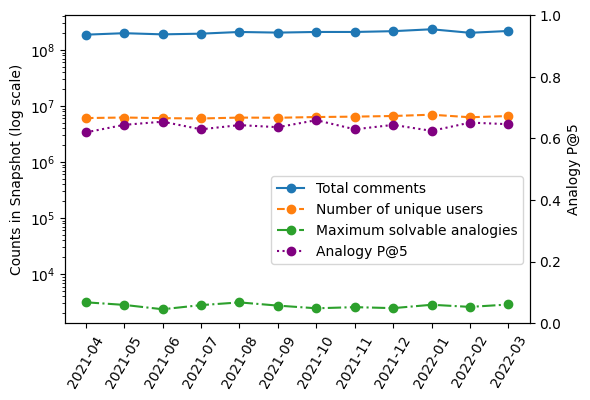

<Figure size 640x480 with 0 Axes>

In [7]:
fig, ax = plt.subplots(figsize=[6,4])
comments_line = ax.plot('month', 'total_comments', data=metrics_df, label="Total comments", marker='o')
users_line = ax.plot('month', 'num_users', data=metrics_df, label="Number of unique users", linestyle="--", marker='o')
analogies_line = ax.plot('month', 'total_analogies_available', data=metrics_df, label="Maximum solvable analogies", linestyle="-.", marker='o')
ax.set_yscale('log')
ax.set_ylabel("Counts in Snapshot (log scale)")
ax.set_ylim(bottom=0)
plt.legend()
plt.xticks(rotation=60)

ax2 = ax.twinx()
p_line = ax2.plot("month", "analogy_accuracy", data=metrics_df, label="Analogy P@5", color="purple", linestyle=":", marker='o')
ax2.set_ylim(0,1)
ax2.set_ylabel("Analogy P@5")

lns = comments_line + users_line + analogies_line + p_line
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc="best", bbox_to_anchor=(1, 0.5))


plt.savefig(VIZ_PATH / "snapshot_stats.png", bbox_inches="tight")


plt.show()
plt.clf()